# Projeto 1: “Churn” de clientes em uma empresa de telecomunicações
Integrantes: Leandro, Miguel e Ygor

# Carregamento dos dados

In [1]:
import pandas as pd
dataset = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Tratamento dos dados

In [2]:
# Verificando todas as colunas do dataset e se há valores ausentes
dataset.columns.values
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Treinamemto do modelo e validação

In [3]:
# Verificando os tipos de dados presentes no dataset
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [4]:
# Importando bibliotecas para construção do modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Criando as features e a target
X = dataset.drop(['Churn', 'customerID'], axis=1)
y = dataset['Churn']

In [6]:
# Codificando esses valores utilizando pd.factorize()
dados_categoricos = pd.DataFrame()
dados_categoricos['gender'], _ = X['gender'].factorize()
dados_categoricos['Partner'], _ = X['Partner'].factorize()
dados_categoricos['Dependents'], _ = X['Dependents'].factorize()
dados_categoricos['PhoneService'], _ = X['PhoneService'].factorize()
dados_categoricos['MultipleLines'], _ = X['MultipleLines'].factorize()
dados_categoricos['InternetService'], _ = X['InternetService'].factorize()
dados_categoricos['OnlineSecurity'], _ = X['OnlineSecurity'].factorize()
dados_categoricos['OnlineBackup'], _ = X['OnlineBackup'].factorize()
dados_categoricos['DeviceProtection'], _ = X['DeviceProtection'].factorize()
dados_categoricos['TechSupport'], _ = X['TechSupport'].factorize()
dados_categoricos['StreamingTV'], _ = X['StreamingTV'].factorize()
dados_categoricos['StreamingMovies'], _ = X['StreamingMovies'].factorize()
dados_categoricos['Contract'], _ = X['Contract'].factorize()
dados_categoricos['PaperlessBilling'], _ = X['PaperlessBilling'].factorize()
dados_categoricos['PaymentMethod'], _ = X['PaymentMethod'].factorize()
dados_categoricos['TotalCharges'], _ = X['TotalCharges'].factorize()

In [7]:
# Criar o modelo
classificador = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [8]:
# Treinar o modelo
modelo = classificador.fit(dados_categoricos, y)

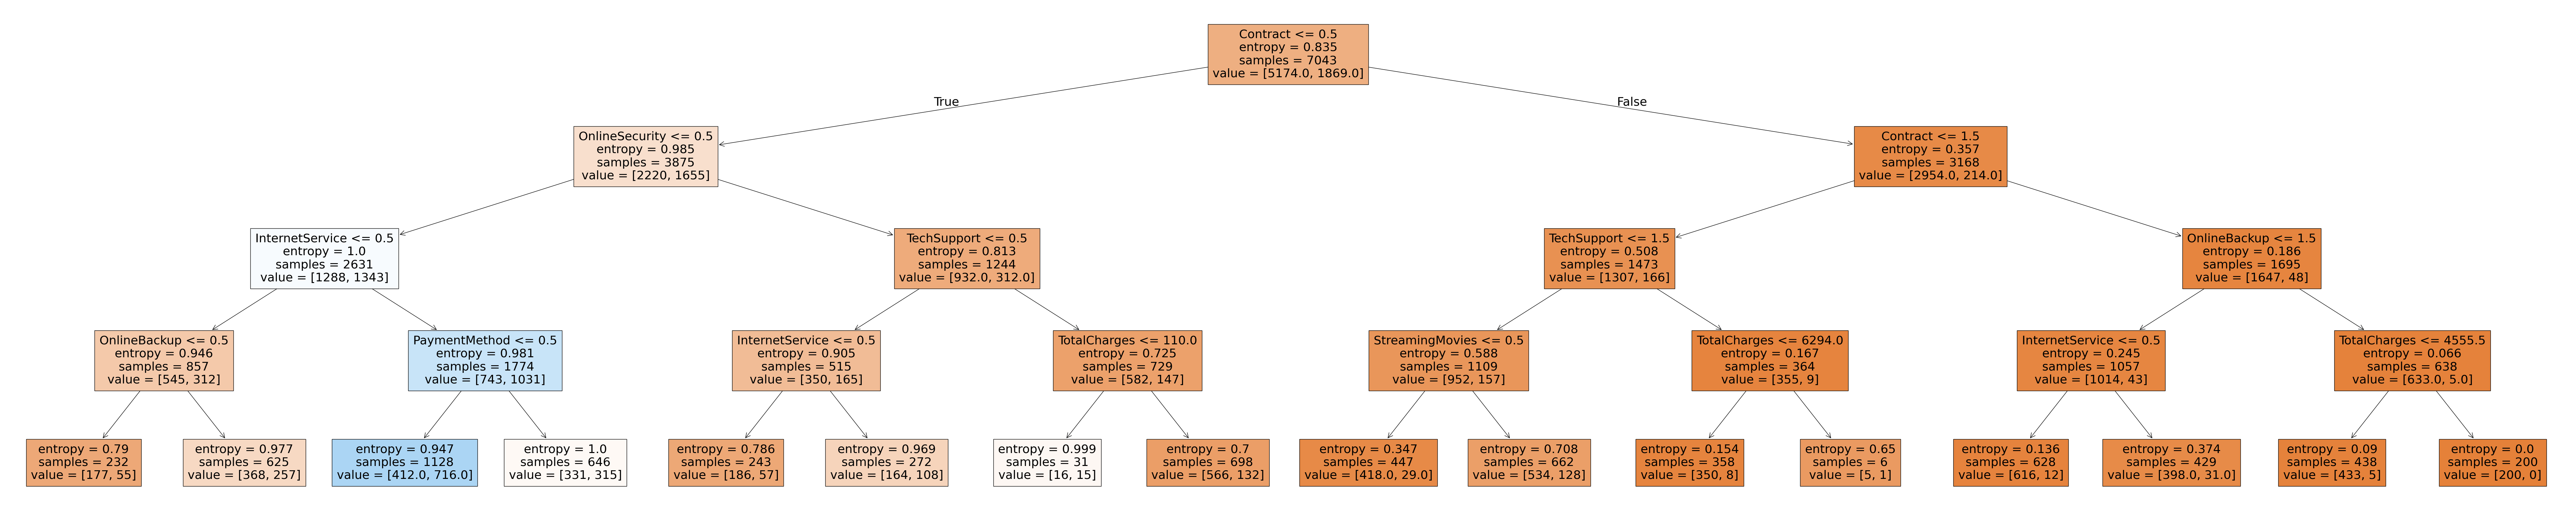

In [9]:
# Gera a figura
plt.figure(figsize=(100, 20))
tree.plot_tree(modelo, feature_names=dados_categoricos.columns, filled=True)
plt.show()

In [10]:
# Verificar a precisão do modelo
from sklearn.metrics import accuracy_score
precisao_modelo = accuracy_score(y, modelo.predict(dados_categoricos))
print(f'Precisão do modelo: {precisao_modelo:.2f}')

Precisão do modelo: 0.78


In [11]:
# Determinar features mais importantes
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
n_features = len(dados_categoricos.columns)
print("Features mais importantes:")
for f in range(n_features):
    print(f"{f + 1}. {dados_categoricos.columns[indices[f]]} ({importances[indices[f]]:.2f})")

Features mais importantes:
1. Contract (0.70)
2. OnlineSecurity (0.12)
3. InternetService (0.07)
4. TechSupport (0.04)
5. OnlineBackup (0.02)
6. StreamingMovies (0.02)
7. PaymentMethod (0.02)
8. TotalCharges (0.01)
9. PaperlessBilling (0.00)
10. StreamingTV (0.00)
11. DeviceProtection (0.00)
12. MultipleLines (0.00)
13. PhoneService (0.00)
14. Dependents (0.00)
15. Partner (0.00)
16. gender (0.00)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_test, X_train, y_test, y_train = train_test_split(dados_categoricos, y, test_size=0.33, random_state=42)

In [14]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((4718, 16), (2325, 16), (4718,), (2325,))

In [15]:
# Treinar o modelo
tree_model = modelo.fit(X_train, y_train)

In [16]:
# Percentual de acertos
p_de_acertos = modelo.score(X_test, y_test)
p_de_acertos

0.7746926663840611

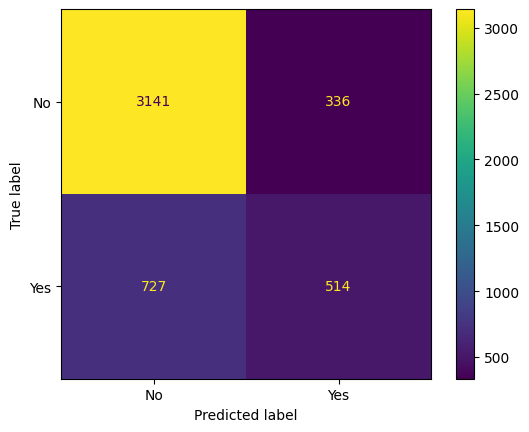

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# Criando a matriz de confusão
cm = ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test)
plt.show()